In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import datetime as dt
import calendar
import cartopy.feature as cfeature

In [2]:
# Open files
pr_c5_hist = xr.open_mfdataset('NorESM1-M/pr_Amon_NorESM1-M_historical_*_197601-200512_2.5_mes.nc',
                                 combine='nested', concat_dim='ensemble')
pr_c5_26_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_mes.nc')
pr_c5_85_close = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_mes.nc')
pr_c5_26_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_mes.nc')
pr_c5_85_far = xr.open_dataset('NorESM1-M/pr_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_mes.nc')

pr_c6_hist = xr.open_mfdataset('NorESM2-LM/pr_Amon_NorESM2-LM_historical_r*_2.5_mes.nc',
                                 combine='nested', concat_dim='ensemble')
pr_c6_126_close = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5_mes.nc')
pr_c6_126_far = xr.open_dataset('NorESM2-LM/pr_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5_mes.nc')

ua_c6_hist = xr.open_mfdataset('NorESM2-LM/ua850_Amon_NorESM2-LM_historical_r*_2.5.nc',
                             combine='nested', concat_dim='ensemble')
ua_c6_126_close = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
ua_c6_126_far = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
ua_c6_585_close = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
ua_c6_585_far = xr.open_dataset('NorESM2-LM/ua850_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')

va_c6_hist = xr.open_mfdataset('NorESM2-LM/va850_Amon_NorESM2-LM_historical_r*_2.5.nc',
                             combine='nested', concat_dim='ensemble')
va_c6_126_close = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
va_c6_126_far = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
va_c6_585_close = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
va_c6_585_far = xr.open_dataset('NorESM2-LM/va850_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')

t_c5_hist = xr.open_mfdataset('NorESM1-M/tas_Amon_NorESM1-M_historical_*_197601-200512_2.5_anu.nc',
                              combine='nested', concat_dim='ensemble')
t_c6_hist = xr.open_mfdataset('NorESM2-LM/tas_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested', concat_dim='ensemble')
t_c5_26_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_202001-204912_2.5_anu.nc')
t_c5_26_far = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp26_r1i1p1_207001-209912_2.5_anu.nc')
t_c5_85_close = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_202001-204912_2.5_anu.nc')
t_c5_85_far = xr.open_dataset('NorESM1-M/tas_Amon_NorESM1-M_rcp85_r1i1p1_207001-209912_2.5_anu.nc')
t_c6_126_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
t_c6_126_far = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
t_c6_585_close = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
t_c6_585_far = xr.open_dataset('NorESM2-LM/tas_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')

h_c5_hist = xr.open_mfdataset('NorESM1-M/huss_Amon_NorESM1-M_historical_r*_197601-200512_2.5_anu.nc',
                              combine='nested', concat_dim='ensemble')
h_c6_hist = xr.open_mfdataset('NorESM2-LM/huss_Amon_NorESM2-LM_historical_r*_2.5.nc',
                              combine='nested', concat_dim='ensemble')
h_c5_26_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_202001-204912_2.5_anu.nc')
h_c5_26_far = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp26_r1_207001-209912_2.5_anu.nc')
h_c5_85_close = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_202001-204912_2.5_anu.nc')
h_c5_85_far = xr.open_dataset('NorESM1-M/huss_Amon_NorESM1-M_rcp85_r1_202001-204912_2.5_anu.nc')
h_c6_126_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2020-2049_2.5.nc')
h_c6_126_far = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp126_r1_2070-2099_2.5.nc')
h_c6_585_close = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2020-2049_2.5.nc')
h_c6_585_far = xr.open_dataset('NorESM2-LM/huss_Amon_NorESM2-LM_ssp585_r1_2070-2099_2.5.nc')



In [3]:
u = ua_c6_hist.ua.mean(dim='ensemble').isel(plev=0)
v = va_c6_hist.va.mean(dim='ensemble').isel(plev=0)

#u[0,0][0::2, 0::2].shape
#print(v)
#print(u)

In [4]:
mask_month_ndjfm_hist = ((pr_c5_hist.time.dt.month == 11) + (pr_c5_hist.time.dt.month == 12) +
                    (pr_c5_hist.time.dt.month == 1) + (pr_c5_hist.time.dt.month == 2) +
                    (pr_c5_hist.time.dt.month == 3))
mask_month_mjjas_hist = ((pr_c5_hist.time.dt.month == 5) + (pr_c5_hist.time.dt.month == 6) +
                    (pr_c5_hist.time.dt.month == 7) + (pr_c5_hist.time.dt.month == 8) +
                    (pr_c5_hist.time.dt.month == 9))
mask_month_ndjfm_close = ((pr_c5_26_close.time.dt.month == 11) + (pr_c5_26_close.time.dt.month == 12) +
                    (pr_c5_26_close.time.dt.month == 1) + (pr_c5_26_close.time.dt.month == 2) +
                    (pr_c5_26_close.time.dt.month == 3))
mask_month_mjjas_close = ((pr_c5_26_close.time.dt.month == 5) + (pr_c5_26_close.time.dt.month == 6) +
                    (pr_c5_26_close.time.dt.month == 7) + (pr_c5_26_close.time.dt.month == 8) +
                    (pr_c5_26_close.time.dt.month == 9))
#print(mask_month_ndjfm)


In [5]:
mask_month_ndjfm = ((pr_c5_26_close.time.dt.month == 11) + (pr_c5_26_close.time.dt.month == 12) +
                    (pr_c5_26_close.time.dt.month == 1) + (pr_c5_26_close.time.dt.month == 2) +
                    (pr_c5_26_close.time.dt.month == 3))
mask_month_mjjas = ((pr_c5_26_close.time.dt.month == 5) + (pr_c5_26_close.time.dt.month == 6) +
                    (pr_c5_26_close.time.dt.month == 7) + (pr_c5_26_close.time.dt.month == 8) +
                    (pr_c5_26_close.time.dt.month == 9))

In [6]:
def set_monsoon_area(dataarray, method='IPCC', hemisphere='SH'):
    if method == 'IPCC':
        dataoutput = dataarray
        if hemisphere == 'SH':
            mask_lat = (dataarray.lat < 0)
            mask_summer = ((dataoutput.time.dt.month == 11) + (dataoutput.time.dt.month == 12) +
                           (dataoutput.time.dt.month == 1)+ (dataoutput.time.dt.month == 2) +
                           (dataoutput.time.dt.month == 3))
            monthly_days_summer = 30.25
            mask_winter = ((dataoutput.time.dt.month == 5) + (dataoutput.time.dt.month == 6) +
                           (dataoutput.time.dt.month == 7) + (dataoutput.time.dt.month == 8) +
                           (dataoutput.time.dt.month == 9))
            monthly_days_winter = 30.6
        elif hemisphere == 'NH':
            mask_lat = (dataarray.lat > 0)
            mask_summer = ((dataoutput.time.dt.month == 5) + (dataoutput.time.dt.month == 6) +
                           (dataoutput.time.dt.month == 7) + (dataoutput.time.dt.month == 8) +
                           (dataoutput.time.dt.month == 9))
            monthly_days_summer = 30.6
            mask_winter = ((dataoutput.time.dt.month == 11) + (dataoutput.time.dt.month == 12) +
                           (dataoutput.time.dt.month == 1)+ (dataoutput.time.dt.month == 2) +
                           (dataoutput.time.dt.month == 3))
            monthly_days_winter = 30.25
        difference = ((dataoutput.where(mask_summer).mean(dim='time') / monthly_days_summer)  - 
                       (dataoutput.where(mask_winter).mean(dim='time') / monthly_days_winter))
        monsoon_area = difference.where(mask_lat).where(difference > 2.5)
        mask_monsoon = monsoon_area.notnull()
        # GMP = xr.ones(mask_monsoon)
    # elif method == 'Hsu':
    #     if hemisphere
    return monsoon_area, mask_monsoon# , GMP

def ploteo_general(dataarray, title=None, vmin=None, vmax=None, projection=ccrs.PlateCarree(), figsize=(20,10)):
    plt.figure(figsize=(figsize))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ploteo = dataarray.plot(vmin=vmin, vmax=vmax, extend='max', ax=ax)
    cmap = ploteo.get_cmap()
    cmap.set_under('w')
    ax.coastlines()
    plt.title(title)
    ax.add_feature(cfeature.BORDERS)



N° celdas histórico 
1191


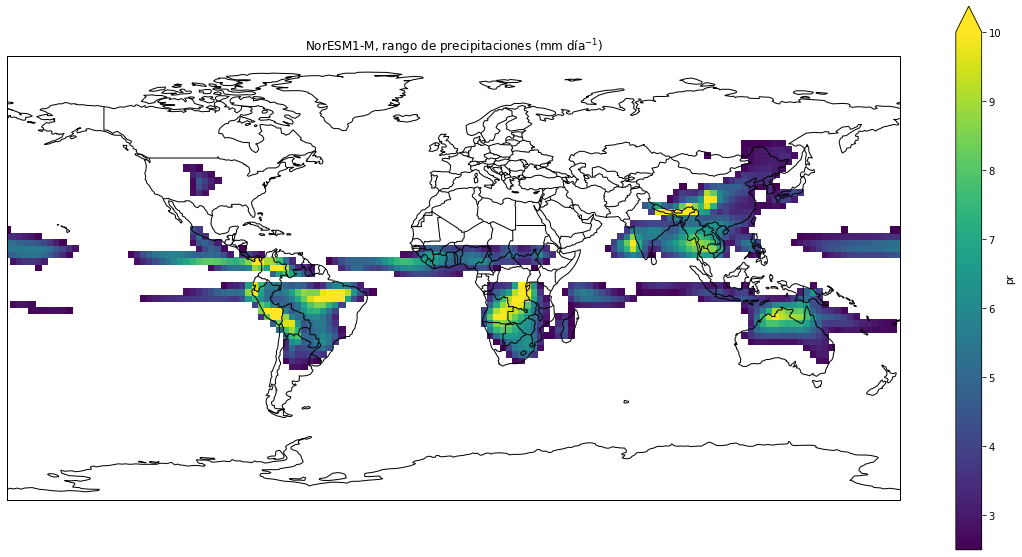

N° celdas RCP 26:
1250


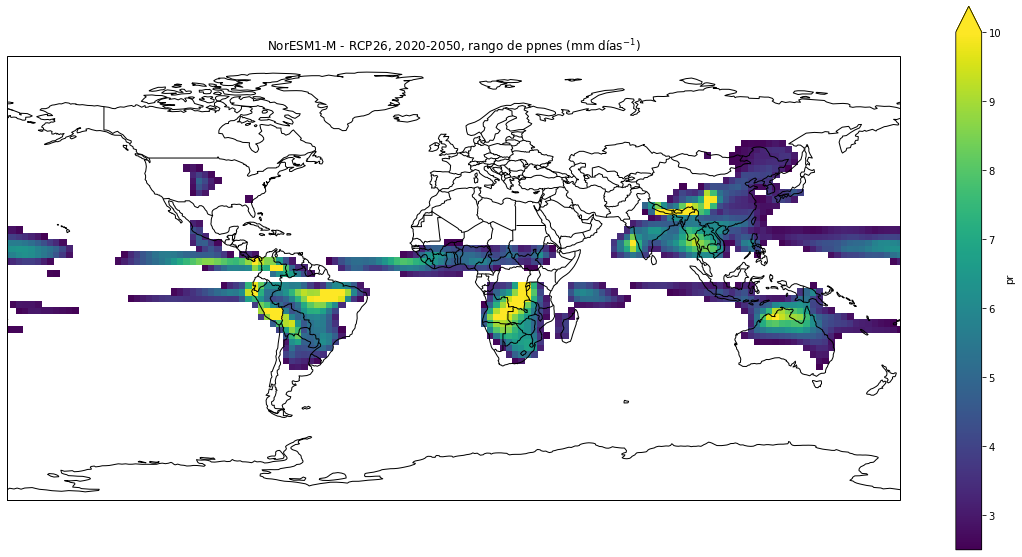

N° celdas RCP 85:
1232


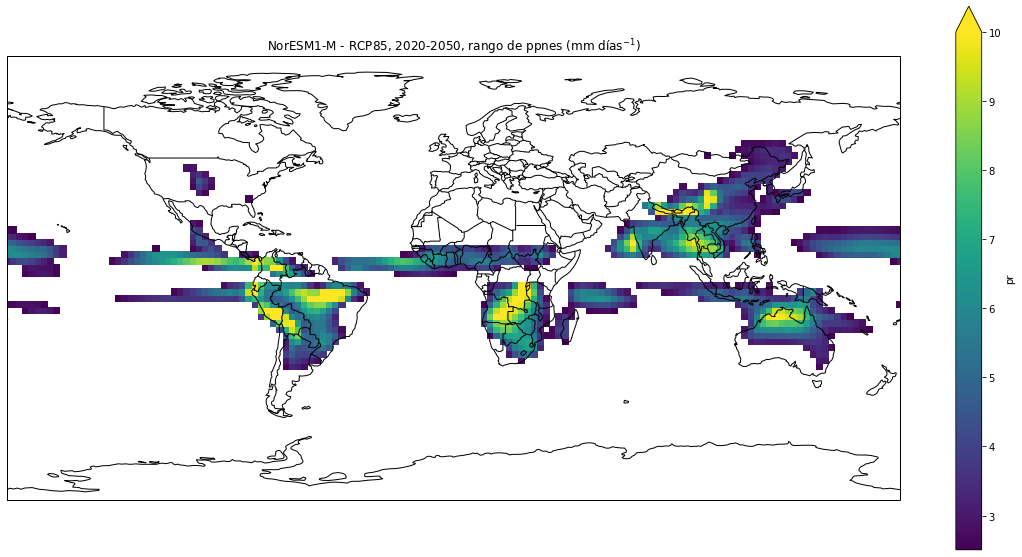

N° celdas RCP 26:
1217


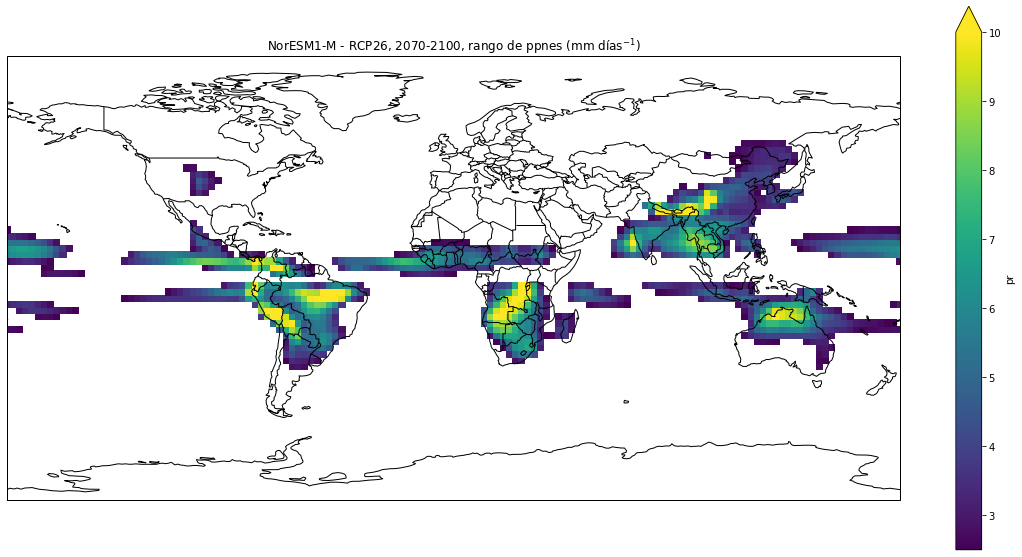

N° celdas RCP 85:
1316


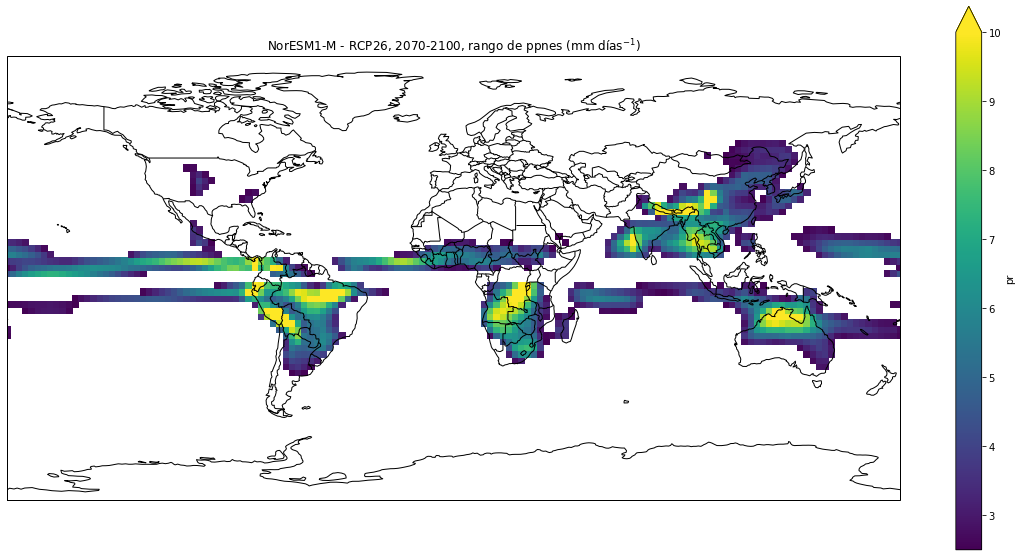

In [7]:
monsoon_sh_hist, area_sh_hist = set_monsoon_area(pr_c5_hist.pr.mean(dim='ensemble'))
monsoon_nh_hist, area_nh_hist = set_monsoon_area(pr_c5_hist.pr.mean(dim='ensemble'), hemisphere='NH')
ploteo_general(monsoon_sh_hist.combine_first(monsoon_nh_hist), vmax=10,
               title='NorESM1-M, rango de precipitaciones (mm día$^{-1}$)')
print('N° celdas histórico ')
print((area_nh_hist + area_sh_hist).sum().values)
plt.show()

####

monsoon_sh_26_close, area_sh_26_close = set_monsoon_area(pr_c5_26_close.pr)
monsoon_nh_26_close, area_nh_26_close = set_monsoon_area(pr_c5_26_close.pr, hemisphere='NH')
ploteo_general(monsoon_sh_26_close.combine_first(monsoon_nh_26_close), vmax = 10,
               title='NorESM1-M - RCP26, 2020-2050, rango de ppnes (mm días$^{-1}$)')
print('N° celdas RCP 26:')
print((area_nh_26_close + area_sh_26_close).sum().values)
plt.show()

#####

monsoon_sh_85_close, area_sh_85_close = set_monsoon_area(pr_c5_85_close.pr)
monsoon_nh_85_close, area_nh_85_close = set_monsoon_area(pr_c5_85_close.pr, hemisphere='NH')
ploteo_general(monsoon_sh_85_close.combine_first(monsoon_nh_85_close), vmax = 10,
               title='NorESM1-M - RCP85, 2020-2050, rango de ppnes (mm días$^{-1}$)')
print('N° celdas RCP 85:')
print((area_nh_85_close + area_sh_85_close).sum().values)
plt.show()

#####

monsoon_sh_26_far, area_sh_26_far = set_monsoon_area(pr_c5_26_far.pr)
monsoon_nh_26_far, area_nh_26_far = set_monsoon_area(pr_c5_26_far.pr, hemisphere='NH')
ploteo_general(monsoon_sh_26_far.combine_first(monsoon_nh_26_far), vmax = 10,
               title='NorESM1-M - RCP26, 2070-2100, rango de ppnes (mm días$^{-1}$)')
print('N° celdas RCP 26:')
print((area_nh_26_far + area_sh_26_far).sum().values)
plt.show()

#####

monsoon_sh_85_far, area_sh_85_far = set_monsoon_area(pr_c5_85_far.pr)
monsoon_nh_85_far, area_nh_85_far = set_monsoon_area(pr_c5_85_far.pr, hemisphere='NH')
ploteo_general(monsoon_sh_85_far.combine_first(monsoon_nh_85_far), vmax = 10,
               title='NorESM1-M - RCP26, 2070-2100, rango de ppnes (mm días$^{-1}$)')
print('N° celdas RCP 85:')
print((area_nh_85_far + area_sh_85_far).sum().values)
plt.show()

In [8]:
# ########### Con rolling average
# average_c5_hist =  pr_c5_hist.pr.mean(dim='ensemble').rolling(time=5)
# average_c5_hist = average_c5_hist.reduce(np.std)
# plt.figure(figsize=(20,10))
# ax = plt.axes(projection=ccrs.PlateCarree())
# difference_NH = ((average_c5_hist.where(average_c5_hist.time.dt.month == 7)/153).mean(dim='time') - (
#                  (average_c5_hist.where(average_c5_hist.time.dt.month == 1)/151).mean(dim='time')))
# difference_NH.plot(axes = ax, vmin=1, vmax=3)
# ax.coastlines()
# ax.add_feature(cfeature.BORDERS)
# 

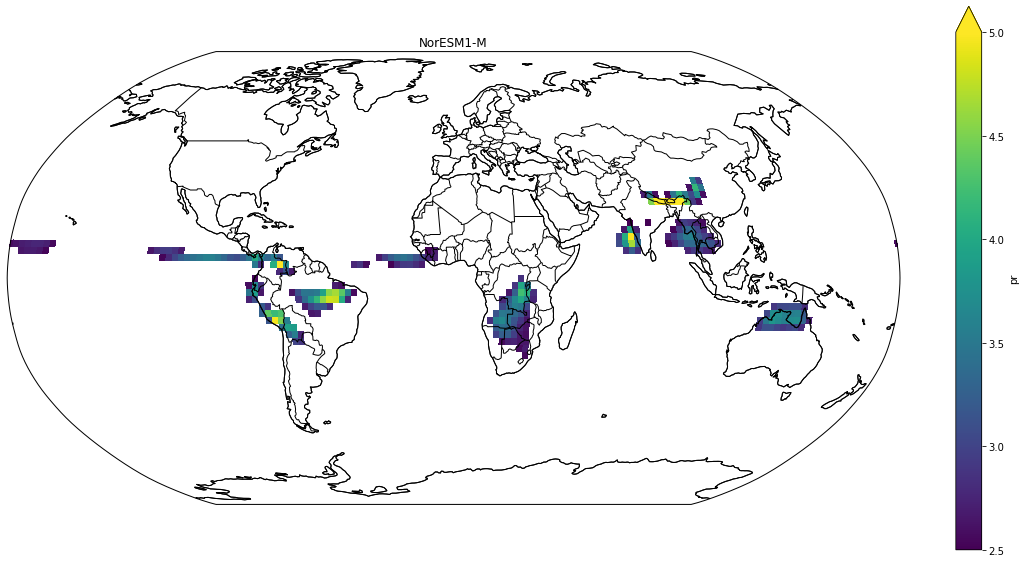

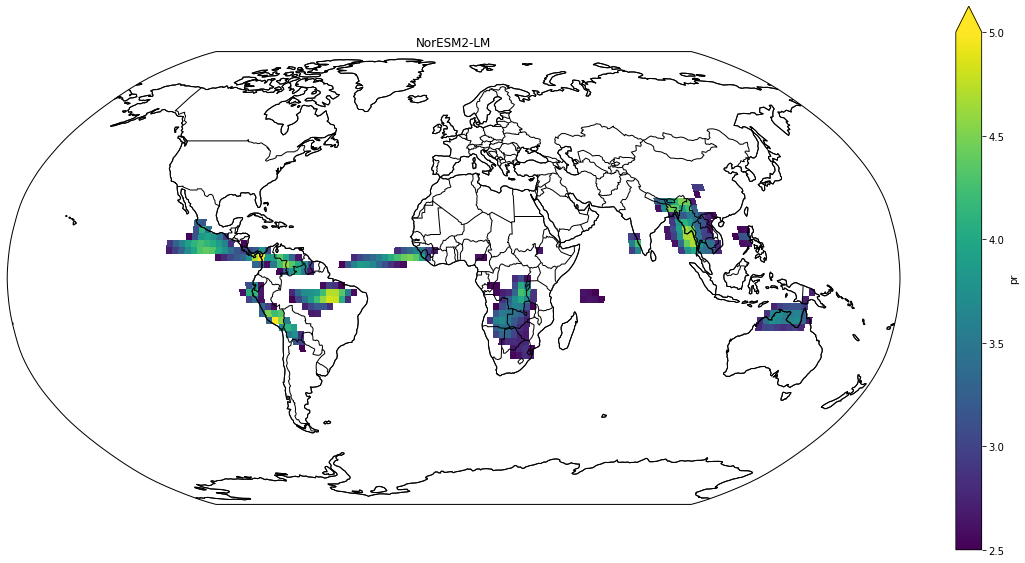

In [9]:
mask_month_djf = ((pr_c5_hist.time.dt.month == 12) +
                    (pr_c5_hist.time.dt.month == 1) + (pr_c5_hist.time.dt.month == 2))
mask_month_jja = ((pr_c5_hist.time.dt.month == 6) +
                    (pr_c5_hist.time.dt.month == 7) + (pr_c5_hist.time.dt.month == 8))

mean_djf = pr_c5_hist.pr.where(mask_month_djf).mean(dim=('time', 'ensemble'))
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

mean_jja = pr_c5_hist.pr.where(mask_month_jja).mean(dim=('time', 'ensemble'))
ploteo = xr.ufuncs.fabs(((mean_djf / 90)- (mean_jja / 92))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=2.5, vmax=5,
                                                              extend='max')
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM1-M');
plt.show();

mean_djm = pr_c6_hist.pr.where(mask_month_djf).mean(dim=('time', 'ensemble'))
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

mean_jja = pr_c6_hist.pr.where(mask_month_jja).mean(dim=('time', 'ensemble'))
ploteo = xr.ufuncs.fabs(((mean_djf / 90)- (mean_jja / 92))).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                                       vmin=2.5, vmax=5,
                                                              extend='max')
cmap = ploteo.get_cmap()
cmap.set_under('w')
ax.set_global(); ax.coastlines();
plt.title('NorESM2-LM');
plt.show();

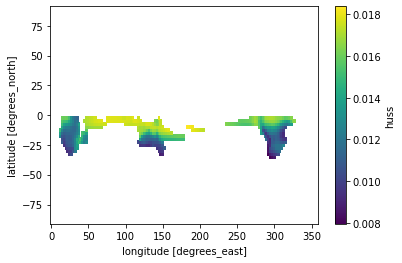

In [12]:
h_c5_hist.huss.mean(dim=('ensemble', 'time')).where(area_sh_hist == 1).plot()